In [8]:
import numpy as np
import scipy as sp
import cancitis_models
import matplotlib.pyplot as plt

In [21]:
def nonreduced_cancitis_rhs(t, u, p=[8.7e-4, 1.5e-3, 1.1e-5, 1.1e-5, 4.7e13, 4.7e13, 2e-3, 2e-3, 129, 129, 2e-9, 7.5e-5, 7.5e-5, 7.5e-5, 7.5e-5, 2, 3e-4, 2e9, 2e-8, 7]):
    # defines the right-hand side of the original cancitis model as defined in the PLOS One paper from 2017
    # for now only allows constant external inflammatory load I (last entry in p)
    rx, ry, ax, ay, Ax, Ay, dx0, dy0, dx1, dy1, dy0t, cxx, cxy, cyx, cyy, es, rs, ea, rm, I = p
    x0, x1, y0, y1, a, s = u
    phix = 1/(1+(cxx*x0 + cxy*y0)**2)
    phiy = 1/(1+(cyx*x0 + cyy*y0)**2)
    return np.array([
        (rx * phix * s - dx0 - ax - rm*s)*x0,
        ax*Ax*x0 - dx1*x1,
        (ry * phiy * s - dy0 - ay)*y0 + rm*s*x0,
        ay*Ay*y0 - dy1*y1,
        dx0*x0 + dx1*x1 + dy0*y0 + dy1*y1 - ea*s*a,
        rs*a - es*s + I
    ])

In [24]:
u0 = [1.01e4, 3.84e10, 0, 0, 699, 3.61]
p = [8.7e-4, 1.3e-3, 1.1e-5, 1.1e-5, 3.7e10, 3.7e10, 2e-3, 2e-3, 0.1, 0.1, 0, 7.5e-5, 7.5e-5, 7.5e-5, 7.5e-5, 2, 3e-4, 1.6e6, 2e-8, 7]
t_final = 80*365
sol = sp.integrate.solve_ivp(nonreduced_cancitis_rhs, (0, t_final), u0, args=(p,), method='BDF')

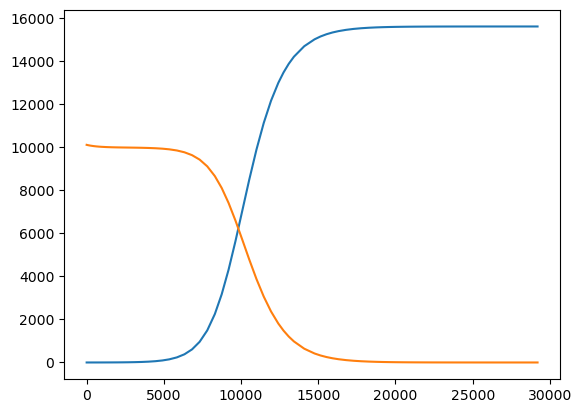

In [28]:
plt.plot(sol.t, sol.y[2])
plt.plot(sol.t, sol.y[0])

In [29]:
sol.t.max()

29200.0

In [30]:
sol.success

True